# Lab 1 Analysis Example using Thicket

In [78]:
import sys
sys.path.append("/scratch/group/csce435-f23/python-3.8.17/lib/python3.8/site-packages")
sys.path.append("/scratch/group/csce435-f23/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read in all the files

In [79]:
tk = th.Thicket.from_caliperreader(glob("*.cali"))

In [80]:
# Performance data
tk.dataframe

nid   spot.channel  \
node                                       profile                           
{'name': 'main', 'type': 'function'}       55101534       1  regionprofile   
                                           100201556      1  regionprofile   
                                           295277911      1  regionprofile   
                                           339702170      1  regionprofile   
                                           345760193      1  regionprofile   
                                           354404808      1  regionprofile   
                                           393780550      1  regionprofile   
                                           569294909      1  regionprofile   
                                           617782299      1  regionprofile   
                                           665975200      1  regionprofile   
                                           708127808      1  regionprofile   
                                           1205757524     1  regionprofile   
                                           1430116159     1  regionprofile   
                                           1693159416     1  regionprofile   
                                           1793904175     1  regionprofile   
                                           1806359314     1  regionprofile   
                                           1888941488     1  regionprofile   
                                           2117395504     1  regionprofile   
                                           2453213632     1  regionprofile   
                                           2595802016     1  regionprofile   
                                           2847255854     1  regionprofile   
                                           3070276550     1  regionprofile   
                                           3437183686     1  regionprofile   
                                           3506142139     1  regionprofile   
                                           3784026123     1  regionprofile   
                                           4288681425     1  regionprofile   
                                           4294640006     1  regionprofile   
{'name': 'comm', 'type': 'function'}       55101534       3  regionprofile   
                                           100201556      3  regionprofile   
                                           295277911      3  regionprofile   
                                           339702170      3  regionprofile   
                                           345760193      3  regionprofile   
                                           354404808      3  regionprofile   
                                           393780550      3  regionprofile   
                                           569294909      3  regionprofile   
                                           617782299      3  regionprofile   
                                           665975200      3  regionprofile   
                                           708127808      3  regionprofile   
                                           1205757524     3  regionprofile   
                                           1430116159     3  regionprofile   
                                           1693159416     3  regionprofile   
                                           1793904175     3  regionprofile   
                                           1806359314     3  regionprofile   
                                           1888941488     3  regionprofile   
                                           2117395504     3  regionprofile   
                                           2453213632     3  regionprofile   
                                           2595802016     3  regionprofile   
                                           2847255854     3  regionprofile   
                                           3070276550     3  regionprofile   
                                           3437183686     3  regionprofile   


Groupby matrix size argument, available in the metadata (tk.metadata) to organize our performance data into 3 groupings.

In [81]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
55101534,2.11.0-dev,1,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p1-a4194304.cali,true,1701221782,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 4194304]",c,BitonicSort,MPI,int,4,4194304,Sorted,1,4,Online
100201556,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a1048576.cali,true,1701221761,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 1048576]",c,BitonicSort,MPI,int,4,1048576,Sorted,16,4,Online
295277911,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a65536.cali,true,1701221664,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 65536]",c,BitonicSort,MPI,int,4,65536,Sorted,64,4,Online
339702170,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p32-a262144.cali,true,1701221723,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 262144]",c,BitonicSort,MPI,int,4,262144,Sorted,32,4,Online
345760193,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a262144.cali,true,1701221702,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 262144]",c,BitonicSort,MPI,int,4,262144,Sorted,8,4,Online
354404808,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a4194304.cali,true,1701221782,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 4194304]",c,BitonicSort,MPI,int,4,4194304,Sorted,2,4,Online
393780550,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a1048576.cali,true,1701221734,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 1048576]",c,BitonicSort,MPI,int,4,1048576,Sorted,4,4,Online
569294909,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a262144.cali,true,1701221723,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 262144]",c,BitonicSort,MPI,int,4,262144,Sorted,64,4,Online
617782299,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a65536.cali,true,1701221623,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 65536]",c,BitonicSort,MPI,int,4,65536,Sorted,2,4,Online


In [5]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b comm\x1b\n│  ├─ \x1b1.000\x1b comm_large\x1b\n│  │  ├─ \x1b1.000\x1b MPI_Recv_1\x1b\n│  │  ├─ \x1b1.000\x1b MPI_Recv_2\x1b\n│  │  ├─ \x1b1.000\x1b MPI_Send_1\x1b\n│  │  └─ \x1b1.000\x1b MPI_Send_2\x1b\n│  ├─ \x1b1.000\x1b comp_large\x1b\n│  └─ \x1b1.000\x1b memcpy_1\x1b\n├─ \x1b1.000\x1b comp_small\x1b\n└─ \x1b1.000\x1b data_init\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [6]:
print(tk.tree())

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2023.3.0

1.000 main
├─ 1.000 comm
│  ├─ 1.000 comm_large
│  │  ├─ 1.000 MPI_Recv_1
│  │  ├─ 1.000 MPI_Recv_2
│  │  ├─ 1.000 MPI_Send_1
│  │  └─ 1.000 MPI_Send_2
│  ├─ 1.000 comp_large
│  └─ 1.000 memcpy_1
├─ 1.000 comp_small
└─ 1.000 data_init

Legend (Metric: time Min: 1.00 Max: 1.00)
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00
█ 1.00 - 1.00

name User code    ◀  Only in left graph    ▶  Only in right graph



In [7]:
gb = tk.groupby("InputSize")

4  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ad562041df0>, 262144: <thicket.thicket.Thicket object at 0x2ad562050760>, 1048576: <thicket.thicket.Thicket object at 0x2ad5621c4af0>, 4194304: <thicket.thicket.Thicket object at 0x2ad5620c3e20>}


In [8]:
print(gb)

{65536: <thicket.thicket.Thicket object at 0x2ad562041df0>, 262144: <thicket.thicket.Thicket object at 0x2ad562050760>, 1048576: <thicket.thicket.Thicket object at 0x2ad5621c4af0>, 4194304: <thicket.thicket.Thicket object at 0x2ad5620c3e20>}


In [9]:
print(gb.values())


dict_values([<thicket.thicket.Thicket object at 0x2ad562041df0>, <thicket.thicket.Thicket object at 0x2ad562050760>, <thicket.thicket.Thicket object at 0x2ad5621c4af0>, <thicket.thicket.Thicket object at 0x2ad5620c3e20>])


Compose these 3 groups column-wise to get a holistic view of the data

In [10]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [11]:
ctk.dataframe

65536                 \
                                                       nid   spot.channel   
node                                       num_procs                        
{'name': 'main', 'type': 'function'}       1             1  regionprofile   
                                           2             1  regionprofile   
                                           4             1  regionprofile   
                                           8             1  regionprofile   
                                           16            1  regionprofile   
                                           32            1  regionprofile   
                                           64            1  regionprofile   
{'name': 'comm', 'type': 'function'}       1             3  regionprofile   
                                           2             3  regionprofile   
                                           4             3  regionprofile   
                                           8             3  regionprofile   
                                           16            3  regionprofile   
                                           32            3  regionprofile   
                                           64            3  regionprofile   
{'name': 'comm_large', 'type': 'function'} 1          <NA>           None   
                                           2             4  regionprofile   
                                           4             4  regionprofile   
                                           8             4  regionprofile   
                                           16            4  regionprofile   
                                           32            4  regionprofile   
                                           64            4  regionprofile   
{'name': 'MPI_Recv_1', 'type': 'function'} 1          <NA>           None   
                                           2             6  regionprofile   
                                           4             6  regionprofile   
                                           8             6  regionprofile   
                                           16            6  regionprofile   
                                           32            6  regionprofile   
                                           64            6  regionprofile   
{'name': 'MPI_Recv_2', 'type': 'function'} 1          <NA>           None   
                                           2            10  regionprofile   
                                           4            10  regionprofile   
                                           8            10  regionprofile   
                                           16           10  regionprofile   
                                           32           10  regionprofile   
                                           64           10  regionprofile   
{'name': 'MPI_Send_1', 'type': 'function'} 1          <NA>           None   
                                           2             5  regionprofile   
                                           4             5  regionprofile   
                                           8             5  regionprofile   
                                           16            5  regionprofile   
                                           32            5  regionprofile   
                                           64            5  regionprofile   
{'name': 'MPI_Send_2', 'type': 'function'} 1          <NA>           None   
                                           2            11  regionprofile   
                                           4            11  regionprofile   
                                           8            11  regionprofile   
                                           16           11  regionprofile   
                                           32           11  regionprofile   
                                           64           11  regionprofile   
{'name': 'comp_large', 'type': 'function'} 1     

Perform pandas operations to get the table in a desirable format for plotting

In [12]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "nid"), (262144, "nid"), (1048576, "nid"), (4194304, "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [13]:
# Drop unwanted columns
# ctk.dataframe = ctk.dataframe.reset_index().drop([("node", ""), (65536, "nid"), (65536, "nid"), (65536, "nid")], axis=1)

# ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
# ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)
# Rename index to remove tuple
# ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_threads", ""): "num_threads"}).set_index(["name", "num_threads"])
# # Drop "time" label as it is redundant
# ctk.dataframe.columns = ctk.dataframe.columns.droplevel(1)

In [14]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [15]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Min time/rank"), (262144, "Min time/rank"), (1048576, "Min time/rank"), (4194304, "Min time/rank")], axis=1)

In [16]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Max time/rank"), (262144, "Max time/rank"), (1048576, "Max time/rank"), (4194304, "Max time/rank")], axis=1)

In [17]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Variance time/rank"), (262144, "Variance time/rank"), (1048576, "Variance time/rank"), (4194304, "Variance time/rank")], axis=1)

In [18]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [19]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

In [20]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Total time"), (262144, "Total time"), (1048576, "Total time"), (4194304, "Total time")], axis=1)

In [21]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [22]:
ctk.dataframe

65536        262144       1048576       4194304
                     Avg time/rank Avg time/rank Avg time/rank Avg time/rank
name       num_procs                                                        
main       1              0.332696      0.261903      0.261889      0.276305
           2              0.524781      0.532864      0.623327      0.992168
           4              0.373661      0.450730      0.712227      1.929796
           8              0.522805      0.636901      1.166551      3.514614
           16             0.809264      0.985015      1.873723      5.765088
           32             1.435456      1.742441      3.109969      9.143574
           64             2.826543      3.577317      7.463926           NaN
comm       1              0.000026      0.000028      0.000031      0.000040
           2              0.008981      0.028964      0.114733      0.480417
           4              0.022453      0.083885      0.351893      1.541104
           8              0.038887      0.156646      0.679502      3.011832
           16             0.069461      0.260090      1.123820      4.997750
           32             0.131705      0.424243      1.775541      7.812756
           64             0.245020      1.074881      4.857145           NaN
comm_large 1                   NaN           NaN           NaN           NaN
           2              0.001613      0.002417      0.005727      0.010734
           4              0.003750      0.005953      0.018824      0.080884
           8              0.004736      0.008168      0.028684      0.127884
           16             0.013930      0.014788      0.046000      0.198297
           32             0.049646      0.049918      0.111233      0.381599
           64             0.108712      0.174630      0.315790           NaN
MPI_Recv_1 1                   NaN           NaN           NaN           NaN
           2              0.000550      0.002623      0.001982      0.007059
           4              0.004062      0.004949      0.014999      0.067349
           8              0.001041      0.005076      0.016491      0.072357
           16             0.006214      0.006717      0.019754      0.091704
           32             0.023342      0.020599      0.043253      0.125323
           64             0.063975      0.098918      0.129542           NaN
MPI_Recv_2 1                   NaN           NaN           NaN           NaN
           2              0.001325      0.001118      0.006517      0.005648
           4              0.000566      0.001560      0.005020      0.019604
           8              0.002845      0.002400      0.009005      0.044300
           16             0.008022      0.006337      0.018134      0.075974
           32             0.027098      0.026537      0.052569      0.192625
           64             0.045188      0.070286      0.146862           NaN
MPI_Send_1 1                   NaN           NaN           NaN           NaN
           2              0.001112      0.000514      0.001396      0.004318
           4              0.000192      0.000671      0.002844      0.012593
           8              0.001300      0.000966      0.004161      0.017192
           16             0.000293      0.001345      0.006572      0.026029
           32             0.000355      0.002212      0.011139      0.047094
           64             0.000609      0.004059      0.026444           NaN
MPI_Send_2 1                   NaN           NaN           NaN           NaN
           2              0.000178      0.000515      0.001499      0.004346
           4              0.000104      0.000670      0.002140      0.008184
           8              0.000116      0.000760      0.002974      0.012104
           16             0.000168      0.001175      0.004357      0.017498
           32             0.000234      0.001845      0.007403      0.028295
           64             0.000326      0.003570      0.016510           NaN
comp_large 1             

In [23]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [24]:
df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1

# df_1 = ctk.dataframe.loc[:,(65536)] # all rows 1 column
# df_1

# df_1 = ctk.dataframe.loc['main'] # all rows 1 column
# df_1 = ctk.dataframe
df_1

# df_1 = df_1.loc[]

# df_2 = df_1.loc[[64,128,256,512]]
# df_2

# df_1 = ctk.dataframe.loc['main'] # all columns 1 row


# df_2 =  ctk.dataframe.reset_index().drop([(262144),(1048576),(4194304)], axis=1)
# df_2

,Avg time/rank
num_procs,
1,0.332696
2,0.524781
4,0.373661
8,0.522805
16,0.809264
32,1.435456
64,2.826543


In [25]:
# import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

In [26]:
# # for matrix in matrix_sizes:
    
# for name in function_names:
#     plot_pandas(
#         df=ctk.dataframe.loc[name],
#         title=name,
#         xlabel="Threads",
#         ylabel="Time (seconds)",
#         loglog=True,
#         figsize=(20, 20)
#     )
#     plt.show()

In [27]:
# ctk.dataframe

## SPEEDUP


In [28]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("num_procs", axis=1).set_index("name")/ctk.dataframe

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [29]:
speedup_df

65536        262144       1048576       4194304
                     Avg time/rank Avg time/rank Avg time/rank Avg time/rank
name       num_procs                                                        
main       1              1.000000      1.000000      1.000000      1.000000
           2              0.633971      0.491501      0.420147      0.278486
           4              0.890369      0.581064      0.367704      0.143178
           8              0.636367      0.411215      0.224499      0.078616
           16             0.411109      0.265887      0.139769      0.047927
           32             0.231770      0.150308      0.084210      0.030218
           64             0.117704      0.073212      0.035087           NaN
comm       1              1.000000      1.000000      1.000000      1.000000
           2              0.002895      0.000967      0.000270      0.000083
           4              0.001158      0.000334      0.000088      0.000026
           8              0.000669      0.000179      0.000046      0.000013
           16             0.000374      0.000108      0.000028      0.000008
           32             0.000197      0.000066      0.000017      0.000005
           64             0.000106      0.000026      0.000006           NaN
comm_large 1                   NaN           NaN           NaN           NaN
           2                   NaN           NaN           NaN           NaN
           4                   NaN           NaN           NaN           NaN
           8                   NaN           NaN           NaN           NaN
           16                  NaN           NaN           NaN           NaN
           32                  NaN           NaN           NaN           NaN
           64                  NaN           NaN           NaN           NaN
MPI_Recv_1 1                   NaN           NaN           NaN           NaN
           2                   NaN           NaN           NaN           NaN
           4                   NaN           NaN           NaN           NaN
           8                   NaN           NaN           NaN           NaN
           16                  NaN           NaN           NaN           NaN
           32                  NaN           NaN           NaN           NaN
           64                  NaN           NaN           NaN           NaN
MPI_Recv_2 1                   NaN           NaN           NaN           NaN
           2                   NaN           NaN           NaN           NaN
           4                   NaN           NaN           NaN           NaN
           8                   NaN           NaN           NaN           NaN
           16                  NaN           NaN           NaN           NaN
           32                  NaN           NaN           NaN           NaN
           64                  NaN           NaN           NaN           NaN
MPI_Send_1 1                   NaN           NaN           NaN           NaN
           2                   NaN           NaN           NaN           NaN
           4                   NaN           NaN           NaN           NaN
           8                   NaN           NaN           NaN           NaN
           16                  NaN           NaN           NaN           NaN
           32                  NaN           NaN           NaN           NaN
           64                  NaN           NaN           NaN           NaN
MPI_Send_2 1                   NaN           NaN           NaN           NaN
           2                   NaN           NaN           NaN           NaN
           4                   NaN           NaN           NaN           NaN
           8                   NaN           NaN           NaN           NaN
           16                  NaN           NaN           NaN           NaN
           32                  NaN           NaN           NaN           NaN
           64                  NaN           NaN           NaN           NaN
comp_large 1             

/tmp/job.9368732/ipykernel_49951/1053531324.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=figsize)


<Figure size 1440x1440 with 0 Axes>

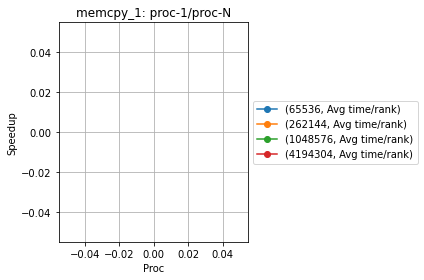

<Figure size 1440x1440 with 0 Axes>

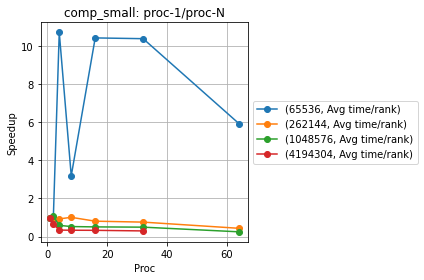

<Figure size 1440x1440 with 0 Axes>

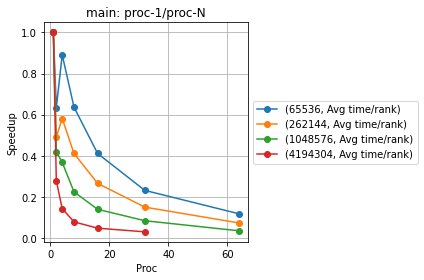

<Figure size 1440x1440 with 0 Axes>

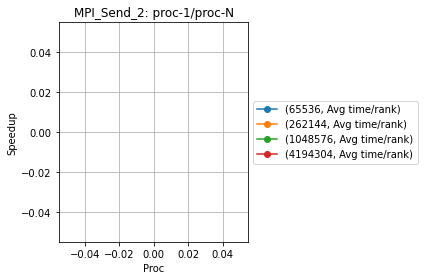

<Figure size 1440x1440 with 0 Axes>

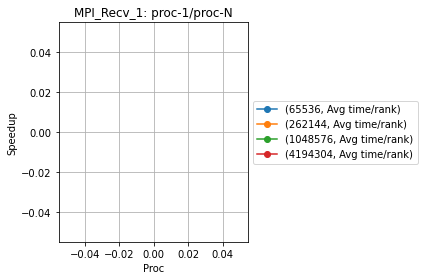

<Figure size 1440x1440 with 0 Axes>

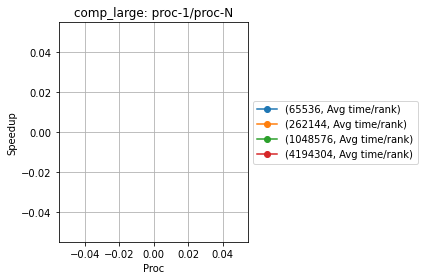

<Figure size 1440x1440 with 0 Axes>

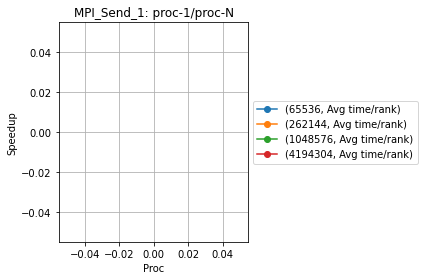

<Figure size 1440x1440 with 0 Axes>

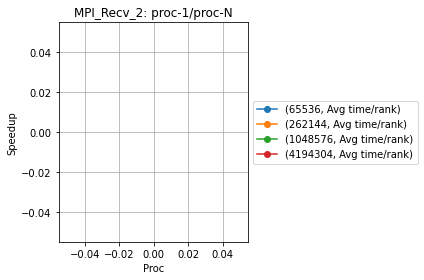

<Figure size 1440x1440 with 0 Axes>

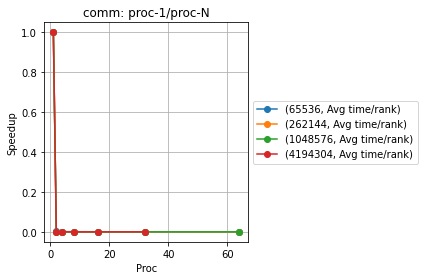

<Figure size 1440x1440 with 0 Axes>

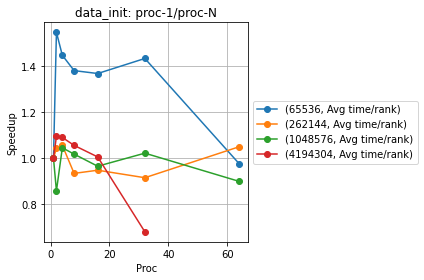

<Figure size 1440x1440 with 0 Axes>

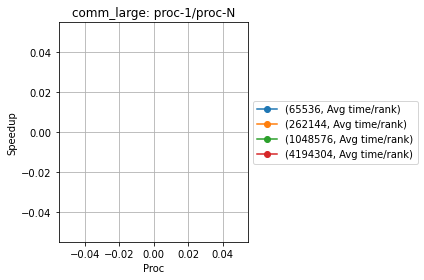

In [33]:
for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: proc-1/proc-N",
        xlabel="Proc",
        ylabel="Speedup",
        loglog=False
    )

## Weak Scaling ---------------------------------------------------------------------------------------

In [34]:
# ctk.dataframe
tk = th.Thicket.from_caliperreader(glob("sorted-1/*.cali"))

In [35]:
# Performance data
tk.dataframe

nid   spot.channel  \
node                                       profile                          
{'name': 'main', 'type': 'function'}       81865917      1  regionprofile   
                                           222571607     1  regionprofile   
                                           242350377     1  regionprofile   
                                           255962098     1  regionprofile   
                                           845268288     1  regionprofile   
                                           857082439     1  regionprofile   
                                           1305151537    1  regionprofile   
                                           1725275348    1  regionprofile   
                                           2040816333    1  regionprofile   
                                           2195422411    1  regionprofile   
                                           2394545122    1  regionprofile   
                                           2427804618    1  regionprofile   
                                           2485918789    1  regionprofile   
                                           2592722091    1  regionprofile   
                                           2811699439    1  regionprofile   
                                           3005249516    1  regionprofile   
                                           3520698944    1  regionprofile   
                                           3600665897    1  regionprofile   
                                           3635117543    1  regionprofile   
                                           3707615906    1  regionprofile   
                                           3974364191    1  regionprofile   
                                           4094461447    1  regionprofile   
                                           4192967645    1  regionprofile   
{'name': 'comm', 'type': 'function'}       81865917      3  regionprofile   
                                           222571607     3  regionprofile   
                                           242350377     3  regionprofile   
                                           255962098     3  regionprofile   
                                           845268288     3  regionprofile   
                                           857082439     3  regionprofile   
                                           1305151537    3  regionprofile   
                                           1725275348    3  regionprofile   
                                           2040816333    3  regionprofile   
                                           2195422411    3  regionprofile   
                                           2394545122    3  regionprofile   
                                           2427804618    3  regionprofile   
                                           2485918789    3  regionprofile   
                                           2592722091    3  regionprofile   
                                           2811699439    3  regionprofile   
                                           3005249516    3  regionprofile   
                                           3520698944    3  regionprofile   
                                           3600665897    3  regionprofile   
                                           3635117543    3  regionprofile   
                                           3707615906    3  regionprofile   
                                           3974364191    3  regionprofile   
                                           4094461447    3  regionprofile   
                                           4192967645    3  regionprofile   
{'name': 'comm_large', 'type': 'function'} 81865917      4  regionprofile   
                                           222571607     4  regionprofile   
                                           242350377     4  regionprofile   
                                           255962098     4  regionprofile   
                                           84526828

In [36]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
81865917,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a262144.cali,true,1701221702,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 262144]",c,BitonicSort,MPI,int,4,262144,Sorted,16,4,Online
222571607,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a1048576.cali,true,1701221734,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 1048576]",c,BitonicSort,MPI,int,4,1048576,Sorted,2,4,Online
242350377,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a4194304.cali,true,1701221784,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 4194304]",c,BitonicSort,MPI,int,4,4194304,Sorted,4,4,Online
255962098,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a1048576.cali,true,1701221761,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 1048576]",c,BitonicSort,MPI,int,4,1048576,Sorted,8,4,Online
845268288,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a1048576.cali,true,1701221762,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 1048576]",c,BitonicSort,MPI,int,4,1048576,Sorted,64,4,Online
857082439,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a65536.cali,true,1701221644,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 65536]",c,BitonicSort,MPI,int,4,65536,Sorted,8,4,Online
1305151537,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p32-a65536.cali,true,1701221664,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 65536]",c,BitonicSort,MPI,int,4,65536,Sorted,32,4,Online
1725275348,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a262144.cali,true,1701221685,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 262144]",c,BitonicSort,MPI,int,4,262144,Sorted,2,4,Online
2040816333,2.11.0-dev,16,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p16-a4194304.cali,true,1701221825,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 4194304]",c,BitonicSort,MPI,int,4,4194304,Sorted,16,4,Online


In [37]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b comm\x1b\n│  ├─ \x1b1.000\x1b comm_large\x1b\n│  │  ├─ \x1b1.000\x1b MPI_Recv_1\x1b\n│  │  ├─ \x1b1.000\x1b MPI_Recv_2\x1b\n│  │  ├─ \x1b1.000\x1b MPI_Send_1\x1b\n│  │  └─ \x1b1.000\x1b MPI_Send_2\x1b\n│  ├─ \x1b1.000\x1b comp_large\x1b\n│  └─ \x1b1.000\x1b memcpy_1\x1b\n├─ \x1b1.000\x1b comp_small\x1b\n└─ \x1b1.000\x1b data_init\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [38]:
gb = tk.groupby("InputSize")

4  thickets created...
{65536: <thicket.thicket.Thicket object at 0x2ad562b8c400>, 262144: <thicket.thicket.Thicket object at 0x2ad562aa9b20>, 1048576: <thicket.thicket.Thicket object at 0x2ad56214dd30>, 4194304: <thicket.thicket.Thicket object at 0x2ad562f85580>}


In [39]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [40]:
ctk.dataframe

65536                 \
                                                       nid   spot.channel   
node                                       num_procs                        
{'name': 'main', 'type': 'function'}       2             1  regionprofile   
                                           4             1  regionprofile   
                                           8             1  regionprofile   
                                           16            1  regionprofile   
                                           32            1  regionprofile   
                                           64            1  regionprofile   
{'name': 'comm', 'type': 'function'}       2             3  regionprofile   
                                           4             3  regionprofile   
                                           8             3  regionprofile   
                                           16            3  regionprofile   
                                           32            3  regionprofile   
                                           64            3  regionprofile   
{'name': 'comm_large', 'type': 'function'} 2             4  regionprofile   
                                           4             4  regionprofile   
                                           8             4  regionprofile   
                                           16            4  regionprofile   
                                           32            4  regionprofile   
                                           64            4  regionprofile   
{'name': 'MPI_Recv_1', 'type': 'function'} 2             6  regionprofile   
                                           4             6  regionprofile   
                                           8             6  regionprofile   
                                           16            6  regionprofile   
                                           32            6  regionprofile   
                                           64            6  regionprofile   
{'name': 'MPI_Recv_2', 'type': 'function'} 2            10  regionprofile   
                                           4            10  regionprofile   
                                           8            10  regionprofile   
                                           16           10  regionprofile   
                                           32           10  regionprofile   
                                           64           10  regionprofile   
{'name': 'MPI_Send_1', 'type': 'function'} 2             5  regionprofile   
                                           4             5  regionprofile   
                                           8             5  regionprofile   
                                           16            5  regionprofile   
                                           32            5  regionprofile   
                                           64            5  regionprofile   
{'name': 'MPI_Send_2', 'type': 'function'} 2            11  regionprofile   
                                           4            11  regionprofile   
                                           8            11  regionprofile   
                                           16           11  regionprofile   
                                           32           11  regionprofile   
                                           64           11  regionprofile   
{'name': 'comp_large', 'type': 'function'} 2             7  regionprofile   
                                           4             7  regionprofile   
                                           8             7  regionprofile   
                                           16            7  regionprofile   
                                           32            7  regionprofile   
                                           64            7  regionprofile   
{'name': 'memcpy_1', 'type': 'function'}   2             8  regionprofile   
                                           4     

In [41]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "spot.channel"), (262144, "spot.channel"), (1048576, "spot.channel"), (4194304, "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "nid"), (262144, "nid"), (1048576, "nid"), (4194304, "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [42]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [43]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Min time/rank"), (262144, "Min time/rank"), (1048576, "Min time/rank"), (4194304, "Min time/rank")], axis=1)

In [44]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Max time/rank"), (262144, "Max time/rank"), (1048576, "Max time/rank"), (4194304, "Max time/rank")], axis=1)

In [45]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Variance time/rank"), (262144, "Variance time/rank"), (1048576, "Variance time/rank"), (4194304, "Variance time/rank")], axis=1)

In [46]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [47]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

In [48]:
ctk.dataframe = ctk.dataframe.reset_index().drop([(65536, "Total time"), (262144, "Total time"), (1048576, "Total time"), (4194304, "Total time")], axis=1)

In [49]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])

In [50]:
ctk.dataframe

65536        262144       1048576       4194304
                     Avg time/rank Avg time/rank Avg time/rank Avg time/rank
name       num_procs                                                        
main       2              0.524781      0.532864      0.623327      0.992168
           4              0.373661      0.450730      0.712227      1.929796
           8              0.522805      0.636901      1.166551      3.514614
           16             0.809264      0.985015      1.873723      5.765088
           32             1.435456      1.742441      3.109969      9.143574
           64             2.826543      3.577317      7.463926           NaN
comm       2              0.008981      0.028964      0.114733      0.480417
           4              0.022453      0.083885      0.351893      1.541104
           8              0.038887      0.156646      0.679502      3.011832
           16             0.069461      0.260090      1.123820      4.997750
           32             0.131705      0.424243      1.775541      7.812756
           64             0.245020      1.074881      4.857145           NaN
comm_large 2              0.001613      0.002417      0.005727      0.010734
           4              0.003750      0.005953      0.018824      0.080884
           8              0.004736      0.008168      0.028684      0.127884
           16             0.013930      0.014788      0.046000      0.198297
           32             0.049646      0.049918      0.111233      0.381599
           64             0.108712      0.174630      0.315790           NaN
MPI_Recv_1 2              0.000550      0.002623      0.001982      0.007059
           4              0.004062      0.004949      0.014999      0.067349
           8              0.001041      0.005076      0.016491      0.072357
           16             0.006214      0.006717      0.019754      0.091704
           32             0.023342      0.020599      0.043253      0.125323
           64             0.063975      0.098918      0.129542           NaN
MPI_Recv_2 2              0.001325      0.001118      0.006517      0.005648
           4              0.000566      0.001560      0.005020      0.019604
           8              0.002845      0.002400      0.009005      0.044300
           16             0.008022      0.006337      0.018134      0.075974
           32             0.027098      0.026537      0.052569      0.192625
           64             0.045188      0.070286      0.146862           NaN
MPI_Send_1 2              0.001112      0.000514      0.001396      0.004318
           4              0.000192      0.000671      0.002844      0.012593
           8              0.001300      0.000966      0.004161      0.017192
           16             0.000293      0.001345      0.006572      0.026029
           32             0.000355      0.002212      0.011139      0.047094
           64             0.000609      0.004059      0.026444           NaN
MPI_Send_2 2              0.000178      0.000515      0.001499      0.004346
           4              0.000104      0.000670      0.002140      0.008184
           8              0.000116      0.000760      0.002974      0.012104
           16             0.000168      0.001175      0.004357      0.017498
           32             0.000234      0.001845      0.007403      0.028295
           64             0.000326      0.003570      0.016510           NaN
comp_large 2              0.007081      0.025495      0.105884      0.459689
           4              0.018302      0.076273      0.327102      1.436122
           8              0.033614      0.145770      0.639603      2.837451
           16             0.054763      0.240774      1.057951      4.719892
           32             0.080851      0.362990      1.617531      7.252691
           64             0.134644      0.882100      4.432992           NaN
memcpy_1   2              0.000033      0.000179      0.000701      0.003176
           4             

In [51]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [77]:
# df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1

# df_1 = ctk.dataframe.loc['main','comm','comm_large','cudaMemcpy_1','comp','comp_large','data_init'] # all rows 1 column


# df_1 = ctk.dataframe.loc[:] # all rows 1 column

# df_1

# df_1 = ctk.dataframe.loc['main'] # all rows 1 column
# df_1 = ctk.dataframe
# df_1
# df_1 = ctk.dataframe.reset_index().drop([("name", "")], axis=1)
# df_1
# df_1 = df_1.loc[]

# df_2 = df_1.loc[[64,128,256,512]]
# df_2

# df_1 = ctk.dataframe.loc['main'] # all columns 1 row


# df_2 =  ctk.dataframe.reset_index().drop([(262144),(1048576),(4194304)], axis=1)
# df_2

In [53]:
import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

<Figure size 1440x1440 with 0 Axes>

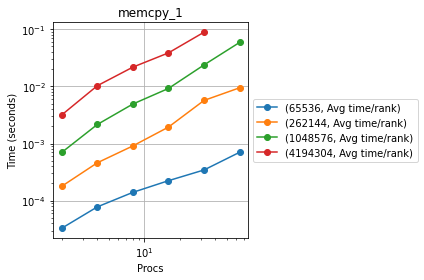

<Figure size 1440x1440 with 0 Axes>

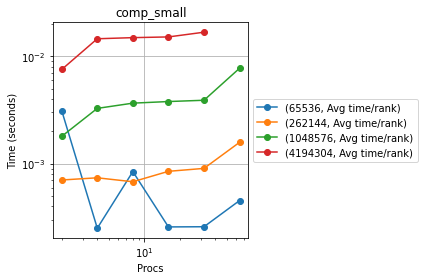

<Figure size 1440x1440 with 0 Axes>

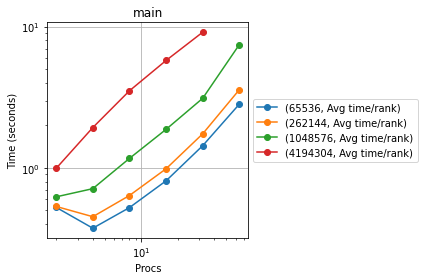

<Figure size 1440x1440 with 0 Axes>

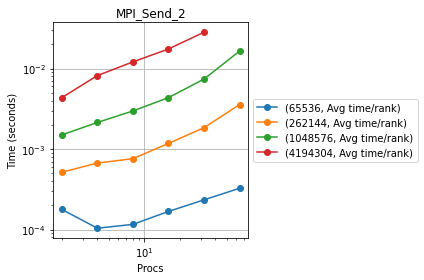

<Figure size 1440x1440 with 0 Axes>

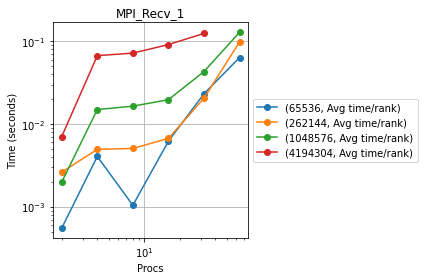

<Figure size 1440x1440 with 0 Axes>

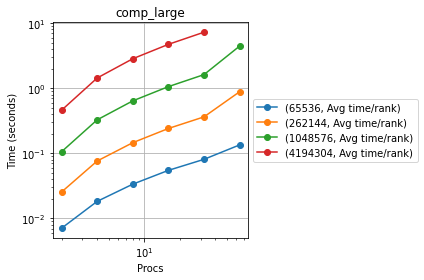

<Figure size 1440x1440 with 0 Axes>

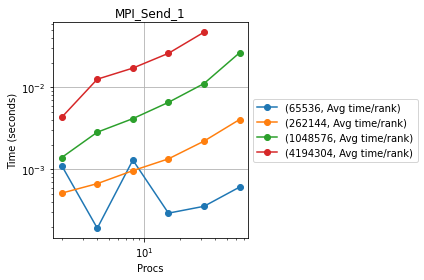

<Figure size 1440x1440 with 0 Axes>

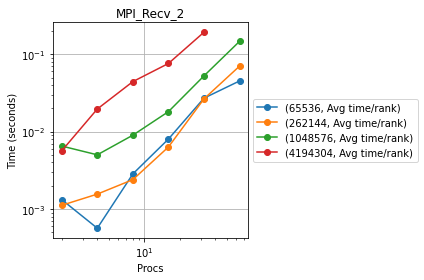

<Figure size 1440x1440 with 0 Axes>

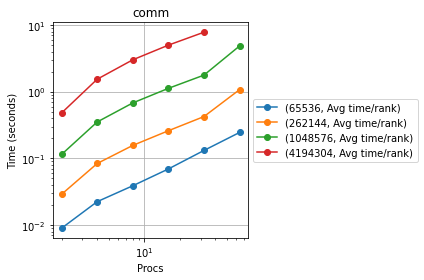

<Figure size 1440x1440 with 0 Axes>

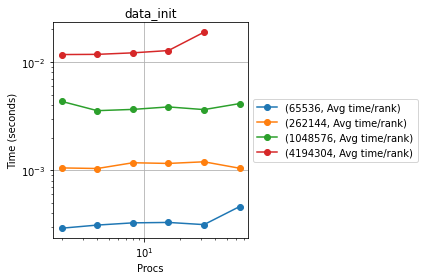

<Figure size 1440x1440 with 0 Axes>

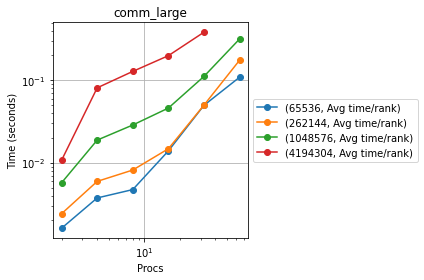

In [54]:
# for matrix in matrix_sizes:
    
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Procs",
        ylabel="Time (seconds)",
        loglog=True,
        figsize=(20, 20)
    )
    plt.show()

In [55]:
ctk.dataframe

65536        262144       1048576       4194304
                     Avg time/rank Avg time/rank Avg time/rank Avg time/rank
name       num_procs                                                        
main       2              0.524781      0.532864      0.623327      0.992168
           4              0.373661      0.450730      0.712227      1.929796
           8              0.522805      0.636901      1.166551      3.514614
           16             0.809264      0.985015      1.873723      5.765088
           32             1.435456      1.742441      3.109969      9.143574
           64             2.826543      3.577317      7.463926           NaN
comm       2              0.008981      0.028964      0.114733      0.480417
           4              0.022453      0.083885      0.351893      1.541104
           8              0.038887      0.156646      0.679502      3.011832
           16             0.069461      0.260090      1.123820      4.997750
           32             0.131705      0.424243      1.775541      7.812756
           64             0.245020      1.074881      4.857145           NaN
comm_large 2              0.001613      0.002417      0.005727      0.010734
           4              0.003750      0.005953      0.018824      0.080884
           8              0.004736      0.008168      0.028684      0.127884
           16             0.013930      0.014788      0.046000      0.198297
           32             0.049646      0.049918      0.111233      0.381599
           64             0.108712      0.174630      0.315790           NaN
MPI_Recv_1 2              0.000550      0.002623      0.001982      0.007059
           4              0.004062      0.004949      0.014999      0.067349
           8              0.001041      0.005076      0.016491      0.072357
           16             0.006214      0.006717      0.019754      0.091704
           32             0.023342      0.020599      0.043253      0.125323
           64             0.063975      0.098918      0.129542           NaN
MPI_Recv_2 2              0.001325      0.001118      0.006517      0.005648
           4              0.000566      0.001560      0.005020      0.019604
           8              0.002845      0.002400      0.009005      0.044300
           16             0.008022      0.006337      0.018134      0.075974
           32             0.027098      0.026537      0.052569      0.192625
           64             0.045188      0.070286      0.146862           NaN
MPI_Send_1 2              0.001112      0.000514      0.001396      0.004318
           4              0.000192      0.000671      0.002844      0.012593
           8              0.001300      0.000966      0.004161      0.017192
           16             0.000293      0.001345      0.006572      0.026029
           32             0.000355      0.002212      0.011139      0.047094
           64             0.000609      0.004059      0.026444           NaN
MPI_Send_2 2              0.000178      0.000515      0.001499      0.004346
           4              0.000104      0.000670      0.002140      0.008184
           8              0.000116      0.000760      0.002974      0.012104
           16             0.000168      0.001175      0.004357      0.017498
           32             0.000234      0.001845      0.007403      0.028295
           64             0.000326      0.003570      0.016510           NaN
comp_large 2              0.007081      0.025495      0.105884      0.459689
           4              0.018302      0.076273      0.327102      1.436122
           8              0.033614      0.145770      0.639603      2.837451
           16             0.054763      0.240774      1.057951      4.719892
           32             0.080851      0.362990      1.617531      7.252691
           64             0.134644      0.882100      4.432992           NaN
memcpy_1   2              0.000033      0.000179      0.000701      0.003176
           4             

## STRONG SCALING ------------------------------------------------------------------------------------


In [56]:
# ctk.dataframe
tk = th.Thicket.from_caliperreader(glob("everything/*.cali"))

In [57]:
# Performance data
tk.dataframe

nid   spot.channel  \
node                                       profile                          
{'name': 'main', 'type': 'function'}       324896906     1  regionprofile   
                                           442769101     1  regionprofile   
                                           541045307     1  regionprofile   
                                           660683018     1  regionprofile   
                                           1156691783    1  regionprofile   
                                           1178790234    1  regionprofile   
                                           1212974445    1  regionprofile   
                                           1470718840    1  regionprofile   
                                           1552196888    1  regionprofile   
                                           1685166494    1  regionprofile   
                                           1706807343    1  regionprofile   
                                           1750297900    1  regionprofile   
                                           1859530897    1  regionprofile   
                                           1866240949    1  regionprofile   
                                           2208355334    1  regionprofile   
                                           2298139217    1  regionprofile   
                                           2492882728    1  regionprofile   
                                           2739842088    1  regionprofile   
                                           2937041141    1  regionprofile   
                                           3209039813    1  regionprofile   
                                           3387978378    1  regionprofile   
                                           4038199577    1  regionprofile   
                                           4111788121    1  regionprofile   
                                           4139722099    1  regionprofile   
{'name': 'comm', 'type': 'function'}       324896906     3  regionprofile   
                                           442769101     3  regionprofile   
                                           541045307     3  regionprofile   
                                           660683018     3  regionprofile   
                                           1156691783    3  regionprofile   
                                           1178790234    3  regionprofile   
                                           1212974445    3  regionprofile   
                                           1470718840    3  regionprofile   
                                           1552196888    3  regionprofile   
                                           1685166494    3  regionprofile   
                                           1706807343    3  regionprofile   
                                           1750297900    3  regionprofile   
                                           1859530897    3  regionprofile   
                                           1866240949    3  regionprofile   
                                           2208355334    3  regionprofile   
                                           2298139217    3  regionprofile   
                                           2492882728    3  regionprofile   
                                           2739842088    3  regionprofile   
                                           2937041141    3  regionprofile   
                                           3209039813    3  regionprofile   
                                           3387978378    3  regionprofile   
                                           4038199577    3  regionprofile   
                                           4111788121    3  regionprofile   
                                           4139722099    3  regionprofile   
{'name': 'comm_large', 'type': 'function'} 324896906     4  regionprofile   
                                           442769101     4  regionprofile   
                                           54104530

In [58]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:time.variance,launchdate,libraries,cmdline,cluster,Algorithm,ProgrammingModel,Datatype,SizeOfDatatype,InputSize,InputType,num_procs,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,
324896906,2.11.0-dev,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p64-a262144.cali,true,1700510545,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 262144]",c,BitonicSort,MPI,int,4,262144,Random,64,4,Online
442769101,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a262144.cali,true,1701222226,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 262144]",c,BitonicSort,MPI,int,4,262144,ReverseSorted,8,4,Online
541045307,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a262144.cali,true,1701221685,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 262144]",c,BitonicSort,MPI,int,4,262144,Sorted,2,4,Online
660683018,2.11.0-dev,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p8-a262144.cali,true,1700510545,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 262144]",c,BitonicSort,MPI,int,4,262144,Random,8,4,Online
1156691783,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p32-a262144.cali,true,1701221723,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 262144]",c,BitonicSort,MPI,int,4,262144,Sorted,32,4,Online
1178790234,2.11.0-dev,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p2-a262144.cali,true,1701222606,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 262144]",c,BitonicSort,MPI,int,4,262144,1perturbed,2,4,Online
1212974445,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a262144.cali,true,1701222226,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 262144]",c,BitonicSort,MPI,int,4,262144,ReverseSorted,4,4,Online
1470718840,2.11.0-dev,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p32-a262144.cali,true,1701222627,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 262144]",c,BitonicSort,MPI,int,4,262144,1perturbed,32,4,Online
1552196888,2.11.0-dev,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,node.order",regionprofile,spot,true,p4-a262144.cali,true,1701221685,[/scratch/group/csce435-f23/Caliper/caliper/li...,"[./bitonic, 262144]",c,BitonicSort,MPI,int,4,262144,Sorted,4,4,Online


In [59]:
tk.statsframe.dataframe["time"] = 1
tk.tree()

"  _____ _     _      _        _   \n |_   _| |__ (_) ___| | _____| |_ \n   | | | '_ \\| |/ __| |/ / _ \\ __|\n   | | | | | | | (__|   <  __/ |_ \n   |_| |_| |_|_|\\___|_|\\_\\___|\\__|  v2023.3.0\n\n\x1b1.000\x1b main\x1b\n├─ \x1b1.000\x1b comm\x1b\n│  ├─ \x1b1.000\x1b comm_large\x1b\n│  │  ├─ \x1b1.000\x1b MPI_Recv_1\x1b\n│  │  ├─ \x1b1.000\x1b MPI_Recv_2\x1b\n│  │  ├─ \x1b1.000\x1b MPI_Send_1\x1b\n│  │  └─ \x1b1.000\x1b MPI_Send_2\x1b\n│  ├─ \x1b1.000\x1b comp_large\x1b\n│  └─ \x1b1.000\x1b memcpy_1\x1b\n├─ \x1b1.000\x1b comp_small\x1b\n└─ \x1b1.000\x1b data_init\x1b\n\n\x1bLegend\x1b (Metric: time Min: 1.00 Max: 1.00)\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\x1b█ \x1b1.00 - 1.00\n\nname\x1b User code    \x1b◀ \x1b Only in left graph    \x1b▶ \x1b Only in right graph\n"

In [60]:
gb = tk.groupby("InputType")

4  thickets created...
{'1perturbed': <thicket.thicket.Thicket object at 0x2ad56217ff70>, 'Random': <thicket.thicket.Thicket object at 0x2ad562e2fd90>, 'ReverseSorted': <thicket.thicket.Thicket object at 0x2ad562b7a1c0>, 'Sorted': <thicket.thicket.Thicket object at 0x2ad562b17730>}


In [61]:
ctk = th.Thicket.concat_thickets(
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    axis="columns",
    metadata_key="num_procs"
)

In [62]:
ctk.dataframe

1perturbed  \
                                                            nid   
node                                       num_procs              
{'name': 'main', 'type': 'function'}       2                  1   
                                           4                  1   
                                           8                  1   
                                           16                 1   
                                           32                 1   
                                           64                 1   
{'name': 'comm', 'type': 'function'}       2                  3   
                                           4                  3   
                                           8                  3   
                                           16                 3   
                                           32                 3   
                                           64                 3   
{'name': 'comm_large', 'type': 'function'} 2                  4   
                                           4                  4   
                                           8                  4   
                                           16                 4   
                                           32                 4   
                                           64                 4   
{'name': 'MPI_Recv_1', 'type': 'function'} 2                  6   
                                           4                  6   
                                           8                  6   
                                           16                 6   
                                           32                 6   
                                           64                 6   
{'name': 'MPI_Recv_2', 'type': 'function'} 2                 10   
                                           4                 10   
                                           8                 10   
                                           16                10   
                                           32                10   
                                           64                10   
{'name': 'MPI_Send_1', 'type': 'function'} 2                  5   
                                           4                  5   
                                           8                  5   
                                           16                 5   
                                           32                 5   
                                           64                 5   
{'name': 'MPI_Send_2', 'type': 'function'} 2                 11   
                                           4                 11   
                                           8                 11   
                                           16                11   
                                           32                11   
                                           64                11   
{'name': 'comp_large', 'type': 'function'} 2                  7   
                                           4                  7   
                                           8                  7   
                                           16                 7   
                                           32                 7   
                                           64                 7   
{'name': 'memcpy_1', 'type': 'function'}   2                  8   
                                           4                  8   
                                           8                  8   
                                           16                 8   
                                           32                 8   
                                           64                 8   
{'name': 'comp_small', 'type': 'function'} 2                  9   
                                           4                  9   
                                           8                  9   
                                 

In [63]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "spot.channel"), ("Random", "spot.channel"), ("ReverseSorted", "spot.channel"), ("Sorted", "spot.channel")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "nid"), ("Random", "nid"), ("ReverseSorted", "nid"), ("Sorted", "nid")], axis=1)
ctk.dataframe = ctk.dataframe.reset_index().drop([("node", "")], axis=1)
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [64]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

/sw/hprc/sw/Python/virtualenvs/Python/3.8.2/default_jupyter_notebook/lib/python3.8/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [65]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "Min time/rank"), ("Random", "Min time/rank"), ("ReverseSorted", "Min time/rank"), ("Sorted", "Min time/rank")], axis=1)

In [66]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "Max time/rank"), ("Random", "Max time/rank"), ("ReverseSorted", "Max time/rank"), ("Sorted", "Max time/rank")], axis=1)

In [67]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "Variance time/rank"), ("Random", "Variance time/rank"), ("ReverseSorted", "Variance time/rank"), ("Sorted", "Variance time/rank")], axis=1)

In [68]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [69]:
ctk.dataframe = ctk.dataframe.drop(['level_0','index'], axis=1)

In [70]:
ctk.dataframe = ctk.dataframe.reset_index().drop([("1perturbed", "Total time"), ("Random", "Total time"), ("ReverseSorted", "Total time"), ("Sorted", "Total time")], axis=1)

In [71]:
ctk.dataframe = ctk.dataframe.rename({("name", ""): "name", ("num_procs", ""): "num_procs"}).set_index(["name", "num_procs"])


In [72]:
ctk.dataframe

1perturbed        Random ReverseSorted        Sorted
                     Avg time/rank Avg time/rank Avg time/rank Avg time/rank
name       num_procs                                                        
main       2              0.601769      0.390218      0.534108      0.532864
           4              0.481328      0.524094      0.448422      0.450730
           8              0.708721      0.721027      0.639189      0.636901
           16             1.039325      1.126467      0.997387      0.985015
           32             1.745348      1.872272      1.750928      1.742441
           64             3.762080      3.995043      3.723125      3.577317
comm       2              0.049770      0.110501      0.033557      0.028964
           4              0.098457      0.162120      0.085616      0.083885
           8              0.175940      0.235607      0.157174      0.156646
           16             0.273630      0.336974      0.258783      0.260090
           32             0.446241      0.516288      0.432496      0.424243
           64             1.127775      1.267563      1.095728      1.074881
comm_large 2              0.004536      0.002151      0.003623      0.002417
           4              0.004294      0.003863      0.007881      0.005953
           8              0.008574      0.006112      0.008431      0.008168
           16             0.010578      0.011356      0.013691      0.014788
           32             0.055542      0.058573      0.060228      0.049918
           64             0.187147      0.168541      0.186290      0.174630
MPI_Recv_1 2              0.002478      0.001842      0.001641      0.002623
           4              0.002488      0.001854      0.003359      0.004949
           8              0.003705      0.002287      0.002802      0.005076
           16             0.004401      0.004204      0.003373      0.006717
           32             0.024447      0.025160      0.030056      0.020599
           64             0.097994      0.095057      0.105968      0.098918
MPI_Recv_2 2              0.003233      0.001431      0.004281      0.001118
           4              0.001720      0.001931      0.005789      0.001560
           8              0.003830      0.002877      0.004917      0.002400
           16             0.004064      0.005042      0.008557      0.006337
           32             0.028641      0.030983      0.027509      0.026537
           64             0.084396      0.067942      0.076096      0.070286
MPI_Send_1 2              0.002762      0.000757      0.000737      0.000514
           4              0.000878      0.000674      0.000681      0.000671
           8              0.001322      0.000927      0.000970      0.000966
           16             0.001382      0.001484      0.001268      0.001345
           32             0.002136      0.002246      0.002537      0.002212
           64             0.004022      0.004401      0.003556      0.004059
MPI_Send_2 2              0.000518      0.000190      0.000513      0.000515
           4              0.000543      0.000605      0.000586      0.000670
           8              0.000806      0.000763      0.000813      0.000760
           16             0.001236      0.001190      0.001208      0.001175
           32             0.001772      0.001746      0.001745      0.001845
           64             0.002980      0.003224      0.003054      0.003570
comp_large 2              0.044179      0.107235      0.028699      0.025495
           4              0.092433      0.156548      0.076066      0.076273
           8              0.164629      0.226809      0.146004      0.145770
           16             0.258121      0.321191      0.240549      0.240774
           32             0.380381      0.447413      0.362090      0.362990
           64             0.922456      1.081905      0.890781      0.882100
memcpy_1   2              0.000172      0.000171      0.000174      0.000179
           4        

In [73]:
# ctk.dataframe = ctk.dataframe.loc[:,(65536)]

# df_1 = ctk.dataframe.loc['main',(65536)] # both column and row
# df_1
# ctk.dataframe

In [74]:
function_names = set(ctk.dataframe.index.get_level_values('name'))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

In [75]:
import matplotlib.pyplot as plt
def plot_pandas(df, title, xlabel, ylabel, loglog,figsize=(20, 20) ):
    plt.figure(figsize=figsize)
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
        
    )
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.tight_layout()  
    return plot

<Figure size 1440x1440 with 0 Axes>

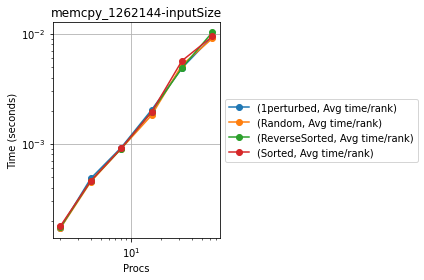

<Figure size 1440x1440 with 0 Axes>

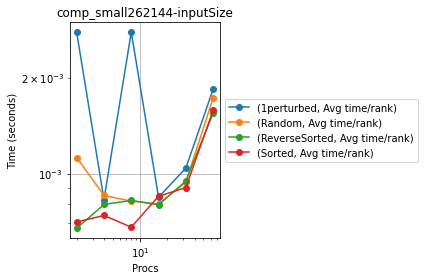

<Figure size 1440x1440 with 0 Axes>

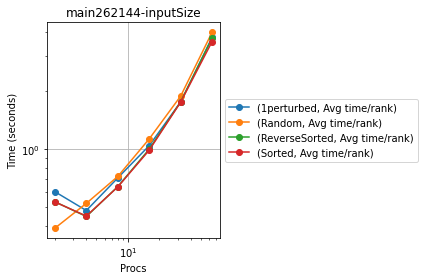

<Figure size 1440x1440 with 0 Axes>

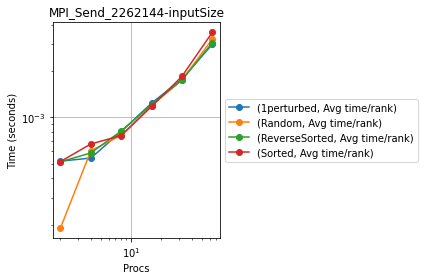

<Figure size 1440x1440 with 0 Axes>

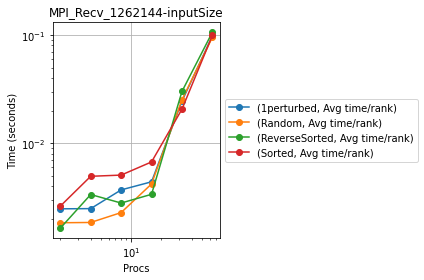

<Figure size 1440x1440 with 0 Axes>

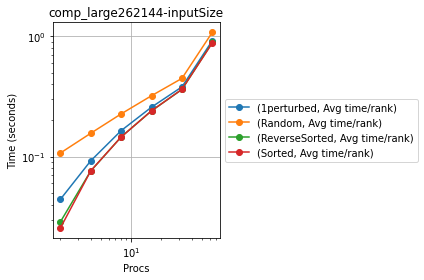

<Figure size 1440x1440 with 0 Axes>

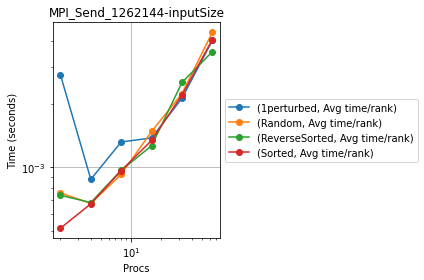

<Figure size 1440x1440 with 0 Axes>

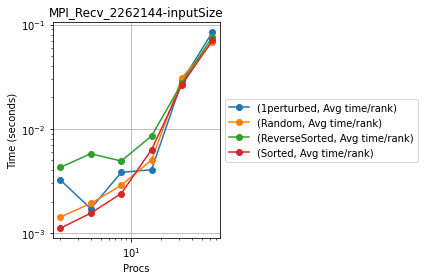

<Figure size 1440x1440 with 0 Axes>

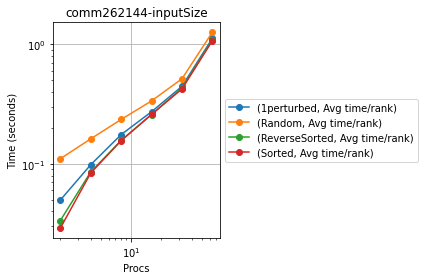

<Figure size 1440x1440 with 0 Axes>

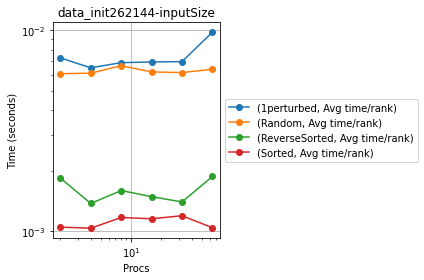

<Figure size 1440x1440 with 0 Axes>

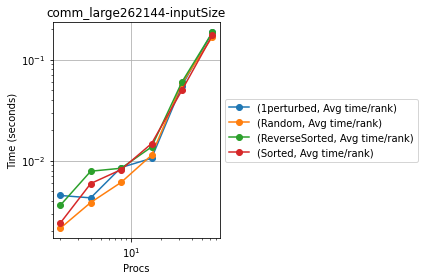

In [76]:
# for matrix in matrix_sizes:
    
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name+"262144-inputSize",
        xlabel="Procs",
        ylabel="Time (seconds)",
        loglog=True,
        figsize=(20, 20)
    )
    plt.show()